In [1]:
from functions_enandes import *

In [3]:
with open('tile012010/resultfiltered_data_p1.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    result_p1 = pickle.load(f)


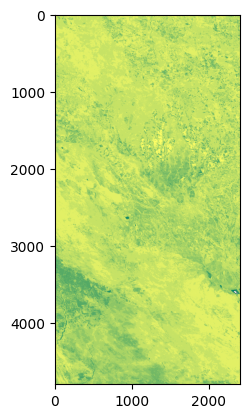

In [4]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('summer', 10)
fig, ax  = plt.subplots()
ndvi_p1 = ax.imshow(result_p1[0,:,:], cmap=cmap)                     
plt.show()

In [96]:
## teste COG

In [94]:
with open('tile013012/resultAve.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    data_array = pickle.load(f)

In [95]:
data_array.shape

(23, 4800, 4800)

In [56]:
width=4800
height=4800
num_bands=23

In [57]:
if data_array.ndim == 2: # Imagem de banda única
    data_array = data_array.reshape(1, height, width) # Adiciona dimensão da banda
    current_num_bands = 1
elif data_array.ndim == 3:
    # Se estiver (height, width, bands), transponha para (bands, height, width)
    if data_array.shape[0] == height and data_array.shape[1] == width:
        data_array = data_array.transpose(2, 0, 1)
        current_num_bands = data_array.shape[0]
    elif data_array.shape[1] == height and data_array.shape[2] == width:
        current_num_bands = data_array.shape[0]
    else:
        print(f"Dimensões do array ({data_array.shape}) não correspondem a altura ({height}), largura ({width}) e/ou formato esperado.")
else:
    print(f"Array com dimensões inesperadas: {data_array.ndim}")


In [86]:
set_tile = '013012'
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')
collection = service.get_collection('mod13q1-6.1')
item_search = service.search(query={'bdc:tiles': {'eq': set_tile}},
                                datetime='2001-01-01/2001-02-10',
                                collections=['mod13q1-6.1'])
item_search.matched()
items = list(item_search.items())
teste = items[1]
teste.bbox

[-65.270364, -40.0, -46.188022, -30.0]

In [93]:
teste


<Item id=MOD13Q1.A2001017.h13v12.061.2020061215719>

In [2]:
dataset = rasterio.open('/home/jovyan/Desktop/enandes_v2/tile013012/resultMax_cog_from_stac.tif')

In [3]:
print(f"Número de bandas: {dataset.count}")
print(f"Altura: {dataset.height} pixels")
print(f"Largura: {dataset.width} pixels")
print(f"Sistema de Coordenadas (CRS): {dataset.crs}")
print(f"Transformação (Affine): {dataset.transform}")
print(f"Tipos de dados das bandas: {dataset.dtypes}")

Número de bandas: 23
Altura: 4800 pixels
Largura: 4800 pixels
Sistema de Coordenadas (CRS): EPSG:4326
Transformação (Affine): | 0.00, 0.00,-65.27|
| 0.00,-0.00,-30.00|
| 0.00, 0.00, 1.00|
Tipos de dados das bandas: ('float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64')


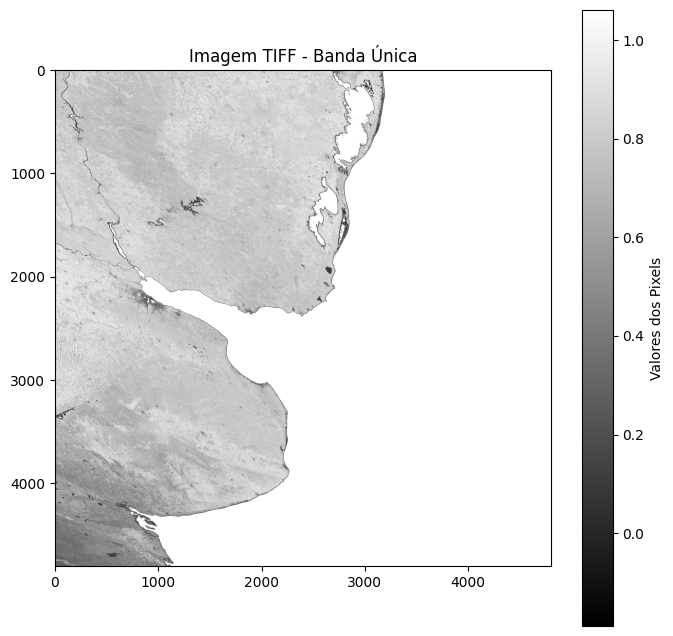

In [4]:
banda_unica = dataset.read(1)

plt.figure(figsize=(8, 8)) # Ajusta o tamanho da figura
plt.imshow(banda_unica, cmap='gray') # 'gray' é um mapa de cores comum para monocromático
plt.title("Imagem TIFF - Banda Única")
plt.colorbar(label='Valores dos Pixels') # Adiciona uma barra de cores
plt.show()